# Homework-lec8 zhangl-1701110221

d:\python34\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


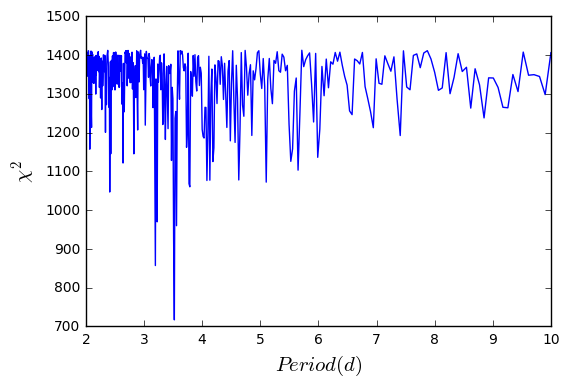

In [31]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def least(p,rv,t,ff,sigma):
    K, w0, e, b = p
    m_rv = K*np.cos(w0)*np.cos(2*np.pi*ff*t) - K*np.sin(w0)*np.sin(2*np.pi*ff*t) + K*e*np.cos(w0) + b*(t-t0)
    ls = ((rv-m_rv)/sigma)
    return ls

#def residuals(p,rv,t,pp):
#    a, w0 = p
#    res = rv-a*np.sin(2*np.pi*t/pp+w0)
#    return res

data = ascii.read('planet1_rv.txt')
rv = data['RV(m/s)']
t = data['JD']
t0 = t[0]
sigma = data['e_RV(m/s)']


frac = np.arange(0.1,0.5,0.001)

chi2 = []
for frac0 in frac:
    p0 = [80.0,0.0,0.0,0.0]
    plsq = leastsq(least, p0, args=(rv,t,frac0,sigma))
    m_rv = (plsq[0][0]*np.cos(plsq[0][1])*np.cos(2*np.pi*frac0*t) - plsq[0][0]*np.sin(plsq[0][1])*np.sin(2*np.pi*frac0*t)
    + plsq[0][0]*plsq[0][2]*np.cos(plsq[0][1]) + plsq[0][3]*(t-t0))
    chii2 = np.sum(((rv-m_rv)/sigma)**2)
    chi2.append(chii2)
    
chi2 = np.array(chi2)

plt.plot(1/frac,chi2)
plt.xlabel('$Period(d)$',fontsize=15)
plt.ylabel('$\\chi^{2}$',fontsize=15)
plt.show()

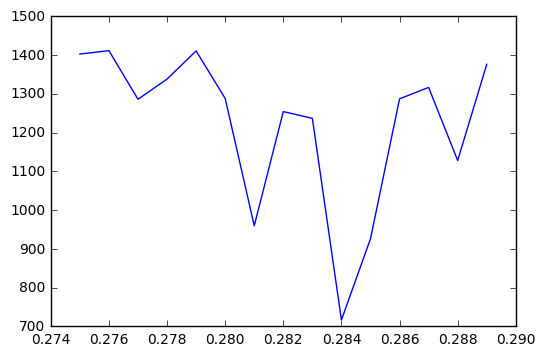

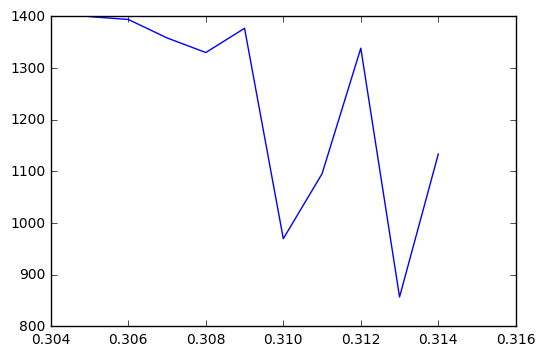

In [32]:
plt.plot(frac[175:190],chi2[175:190])
plt.show()
plt.plot(frac[205:215],chi2[205:215])
plt.show()

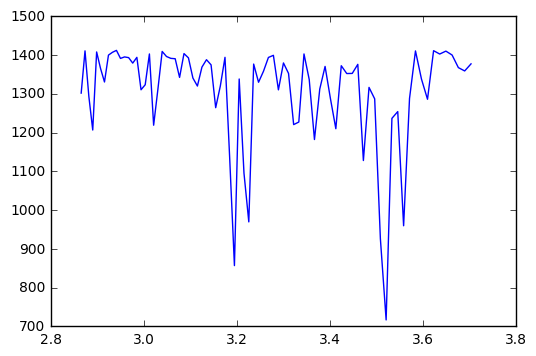

In [33]:
plt.plot(1/frac[170:250],chi2[170:250])
plt.show()

d:\python34\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


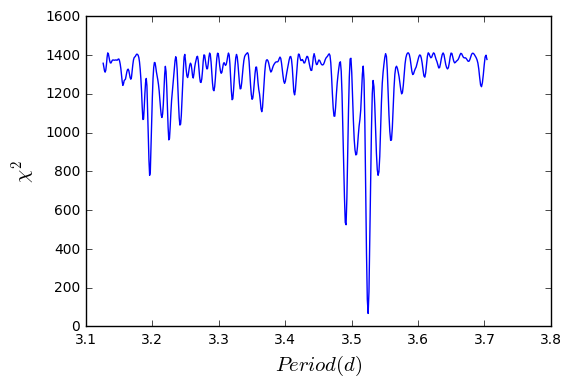

In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def least(p,rv,t,ff,sigma):
    K, w0, e, b = p
    m_rv = K*np.cos(w0)*np.cos(2*np.pi*ff*t) - K*np.sin(w0)*np.sin(2*np.pi*ff*t) + K*e*np.cos(w0) + b*(t-t0)
    ls = ((rv-m_rv)/sigma)
    return ls

data = ascii.read('planet1_rv.txt')
rv = data['RV(m/s)']
t = data['JD']
t0 = t[0]
sigma = data['e_RV(m/s)']


frac = np.arange(0.270,0.320,0.0001)

chi2 = []
for frac0 in frac:
    p0 = [80.0,0.0,0.0,0.0]
    plsq = leastsq(least, p0, args=(rv,t,frac0,sigma))
    m_rv = (plsq[0][0]*np.cos(plsq[0][1])*np.cos(2*np.pi*frac0*t) - plsq[0][0]*np.sin(plsq[0][1])*np.sin(2*np.pi*frac0*t)
    + plsq[0][0]*plsq[0][2]*np.cos(plsq[0][1]) + plsq[0][3]*(t-t0))
    chii2 = np.sum(((rv-m_rv)/sigma)**2)
    chi2.append(chii2)
    
chi2 = np.array(chi2)

plt.plot(1/frac,chi2)
plt.xlabel('$Period(d)$',fontsize=15)
plt.ylabel('$\\chi^{2}$',fontsize=15)
plt.show()

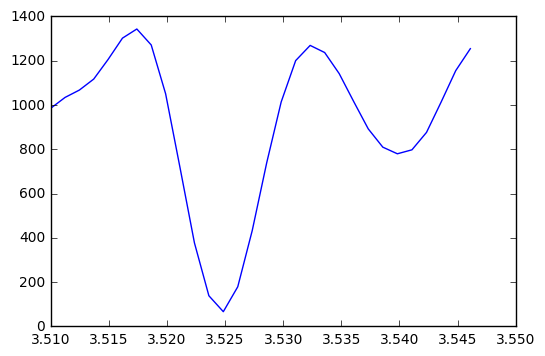

In [3]:
plt.plot(1/frac[120:150],chi2[120:150])
plt.show()

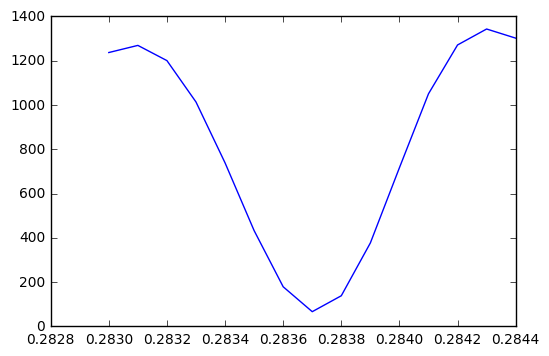

In [5]:
plt.plot(frac[130:145],chi2[130:145])
plt.show()

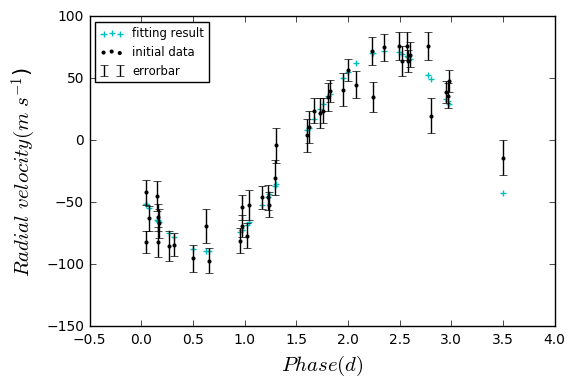

拟合参数:
Period (d)                 : 3.525  d
Doppler amplitude (m s^-1) : 80.875 m s^-1
Eccentricity               : 0.200 
Argument of periastron     : 297.824 deg


In [10]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def least(p,rv,t,ff,sigma):
    K, w0, e, b = p
    m_rv = K*np.cos(w0)*np.cos(2*np.pi*ff*t) - K*np.sin(w0)*np.sin(2*np.pi*ff*t) + K*e*np.cos(w0) + b*(t-t0)
    ls = ((rv-m_rv)/sigma)
    return ls

#def residuals(p,rv,t,pp):
#    a, w0 = p
#    res = rv-a*np.sin(2*np.pi*t/pp+w0)
#    return res

data = ascii.read('planet1_rv.txt')
rv = data['RV(m/s)']
t = data['JD']
t0 = t[0]
sigma = data['e_RV(m/s)']

frac0 = 0.2837
p0 = [100.0,0.0,0.0]
#tt  = np.arange(2450680,2452566,0.1)
p0 = [80.0,0.0,0.0,0.0]
plsq = leastsq(least, p0, args=(rv,t,frac0,sigma))
m_rv = (plsq[0][0]*np.cos(plsq[0][1])*np.cos(2*np.pi*frac0*t) - plsq[0][0]*np.sin(plsq[0][1])*np.sin(2*np.pi*frac0*t) 
        + plsq[0][0]*plsq[0][2]*np.cos(plsq[0][1]) + plsq[0][3]*(t-t0))
plt.scatter(t%(1/frac0),m_rv,s=20,c='c',marker='+',label='fitting result')
plt.scatter(t%(1/frac0),rv,s=15,c='k',marker='.',label='initial data')
plt.errorbar(t%(1/frac0),rv,sigma,c='k',ls='none',label='errorbar')
plt.xlabel('$Phase(d)$',fontsize=15)
plt.ylabel('$Radial\ velocity(m\ s^{-1}$)',fontsize=15)
plt.legend(loc=2,fontsize='small')
plt.show()
period = 1/frac0
w00 = (plsq[0][1]+2*np.pi)%(2*np.pi)/(2*np.pi)*360
amp = np.abs(plsq[0][0])
print (u"拟合参数:")
print('Period (d)                 : %-6.3f d'%period)
print('Doppler amplitude (m s^-1) : %-6.3f m s^-1'%amp)
print('Eccentricity               : %-6.3f'%plsq[0][2])
print('Argument of periastron     : %-6.3f deg'%w00)